In [1]:
import sys
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import timeit
import csv
from itertools import zip_longest

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
def kNN (train, test, train_block, K_value, distance, vet_acur, vet_confusion, vet_time):
    #carrega os dados da base de treinamento
    x_data, y_data = load_svmlight_file(train)
    x_train = x_data[0:train_block]
    y_train = y_data[0:train_block]

    #carrega os dados da base de teste
    x_test, y_test = load_svmlight_file(test)


    #separa o bloco de dados a ser utilizado
    # if (train_block != 20000):
    #     x_train, x_discard, y_train, y_discard = train_test_split(x_data, y_data, train_size=train_block, random_state = 5)
    # else:
    #     x_train = x_data
    #     y_train = y_data

    
    # x vetor de características e Y labels
    x_train = x_train.toarray()
    x_test = x_test.toarray()


    #criar um kNN
    neigh = KNeighborsClassifier(n_neighbors=K_value, metric=distance)


    #treinamento
    neigh.fit(x_train, y_train)
    
    #-------------------MÉDIÇÃO DO TEMPO(INÍCIO)
    starttime = timeit.default_timer()
    # predicao do classificador
    y_pred = neigh.predict(x_test)

    elapsed = timeit.default_timer() - starttime
    vet_time.append(elapsed)
    #-------------------MÉDIÇÃO DO TEMPO(FIM)

    # mostra o resultado do classificador na base de teste
    # print ('[KNN] Accuracy: ',  neigh.score(x_test, y_test))


    #salva no vetor de acurácias
    vet_acur.append(neigh.score(x_test, y_test))
        
        
    # cria a matriz de confusao e salva no vetor de confusões
    cm = confusion_matrix(y_test, y_pred)
    vet_confusion.append(cm)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
def naive_bayes (train, test, train_block, vet_acur, vet_confusion, vet_time):
    #carrega os dados da base de treinamento
    x_data, y_data = load_svmlight_file(train)
    x_train = x_data[0:train_block]
    y_train = y_data[0:train_block]

    #carrega os dados da base de teste
    x_test, y_test = load_svmlight_file(test)


    #separa o bloco de dados a ser utilizado
    # if (train_block != 20000):
    #     x_train, x_discard, y_train, y_discard = train_test_split(x_data, y_data, train_size=train_block, random_state = 5)
    # else:
    #     x_train = x_data
    #     y_train = y_data

    
    # x vetor de características e Y labels
    x_train = x_train.toarray()
    x_test = x_test.toarray()


    #criar um Gaussian Naive Bayes
    gnb = GaussianNB()

    #treinamento
    gnb.fit(x_train, y_train)


    #-------------------MÉDIÇÃO DO TEMPO(INÍCIO)
    starttime = timeit.default_timer()
    # predicao do classificador
    y_pred = gnb.predict(x_test)

    elapsed = timeit.default_timer() - starttime
    vet_time.append(elapsed)
    #-------------------MÉDIÇÃO DO TEMPO(FIM)

    # mostra o resultado do classificador na base de teste
    # print ('[Naive Bayes] Accuracy: ',  gnb.score(x_test, y_test))


    #salva no vetor de acurácias
    vet_acur.append(gnb.score(x_test, y_test))
        
        
    # cria a matriz de confusao e salva no vetor de confusões
    cm = confusion_matrix(y_test, y_pred)
    vet_confusion.append(cm)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
def LDA (train, test, train_block, vet_acur, vet_confusion, vet_time):
    #carrega os dados da base de treinamento
    x_data, y_data = load_svmlight_file(train)
    x_train = x_data[0:train_block]
    y_train = y_data[0:train_block]

    #carrega os dados da base de teste
    x_test, y_test = load_svmlight_file(test)


    #separa o bloco de dados a ser utilizado
    # if (train_block != 20000):
    #     x_train, x_discard, y_train, y_discard = train_test_split(x_data, y_data, train_size=train_block, random_state = 5)
    # else:
    #     x_train = x_data
    #     y_train = y_data

    
    # x vetor de características e Y labels
    x_train = x_train.toarray()
    x_test = x_test.toarray()


    #criar um LDA
    linearDA = LinearDiscriminantAnalysis()

    #treinamento
    linearDA.fit(x_train, y_train)


    #-------------------MÉDIÇÃO DO TEMPO(INÍCIO)
    starttime = timeit.default_timer()
    # predicao do classificador
    y_pred = linearDA.predict(x_test)

    elapsed = timeit.default_timer() - starttime
    vet_time.append(elapsed)
    #-------------------MÉDIÇÃO DO TEMPO(FIM)

    # mostra o resultado do classificador na base de teste
    # print ('[LDA] Accuracy: ',  linearDA.score(x_test, y_test))


    #salva no vetor de acurácias
    vet_acur.append(linearDA.score(x_test, y_test))
        
        
    # cria a matriz de confusao e salva no vetor de confusões
    cm = confusion_matrix(y_test, y_pred)
    vet_confusion.append(cm)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
def logistic_regression (train, test, train_block, tolerance, iterations, vet_acur, vet_confusion, vet_time):
    #carrega os dados da base de treinamento
    x_data, y_data = load_svmlight_file(train)
    x_train = x_data[0:train_block]
    y_train = y_data[0:train_block]

    #carrega os dados da base de teste
    x_test, y_test = load_svmlight_file(test)


    #separa o bloco de dados a ser utilizado
    # if (train_block != 20000):
    #     x_train, x_discard, y_train, y_discard = train_test_split(x_data, y_data, train_size=train_block, random_state = 5)
    # else:
    #     x_train = x_data
    #     y_train = y_data

    
    # x vetor de características e Y labels
    x_train = x_train.toarray()
    x_test = x_test.toarray()


    #criar um kNN
    logistic = LogisticRegression(tol=tolerance, max_iter=iterations, random_state=random.randint(0, 42))

    #treinamento
    logistic.fit(x_train, y_train)


    #-------------------MÉDIÇÃO DO TEMPO(INÍCIO)
    starttime = timeit.default_timer()
    # predicao do classificador
    y_pred = logistic.predict(x_test)

    elapsed = timeit.default_timer() - starttime
    vet_time.append(elapsed)
    #-------------------MÉDIÇÃO DO TEMPO(FIM)

    # mostra o resultado do classificador na base de teste
    # print ('[LR] Accuracy: ',  logistic.score(x_test, y_test))


    #salva no vetor de acurácias
    vet_acur.append(logistic.score(x_test, y_test))
        
        
    # cria a matriz de confusao e salva no vetor de confusões
    cm = confusion_matrix(y_test, y_pred)
    vet_confusion.append(cm)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
def perceptron (train, test, train_block, tolerance, iterations, vet_acur, vet_confusion, vet_time):
    #carrega os dados da base de treinamento
    x_data, y_data = load_svmlight_file(train)
    x_train = x_data[0:train_block]
    y_train = y_data[0:train_block]

    #carrega os dados da base de teste
    x_test, y_test = load_svmlight_file(test)


    #separa o bloco de dados a ser utilizado
    # if (train_block != 20000):
    #     x_train, x_discard, y_train, y_discard = train_test_split(x_data, y_data, train_size=train_block, random_state = 5)
    # else:
    #     x_train = x_data
    #     y_train = y_data

    
    # x vetor de características e Y labels
    x_train = x_train.toarray()
    x_test = x_test.toarray()


    #criar um perceptron
    percep = Perceptron(tol=tolerance, max_iter=iterations, random_state=random.randint(0, 42), shuffle=True, n_jobs=4, n_iter_no_change=10)

    #treinamento
    percep.fit(x_train, y_train)


    #-------------------MÉDIÇÃO DO TEMPO(INÍCIO)
    starttime = timeit.default_timer()
    # predicao do classificador
    y_pred = percep.predict(x_test)

    elapsed = timeit.default_timer() - starttime
    vet_time.append(elapsed)
    #-------------------MÉDIÇÃO DO TEMPO(FIM)

    # mostra o resultado do classificador na base de teste
    # print ('[Perceptron] Accuracy: ',  percep.score(x_test, y_test))


    #salva no vetor de acurácias
    vet_acur.append(percep.score(x_test, y_test))
        
        
    # cria a matriz de confusao e salva no vetor de confusões
    cm = confusion_matrix(y_test, y_pred)
    vet_confusion.append(cm)

In [ ]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.0f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.60)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

In [ ]:
def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "x={:.0f}, y={:.3f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.60)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.80,0.96), **kw)

In [ ]:
def plot_figure(vet_x, vet_y, x_label, y_label, plot_title, y_inf, y_aup, color, annotate, filename):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(vet_x, vet_y, color=color)

    tempx = np.array(vet_x)
    tempy = np.array(vet_y)
    if (annotate == 'max'):
        annot_max(tempx,tempy)
    else:
        annot_min(tempx,tempy)

    ax.set(xlabel=x_label, ylabel=y_label, title=plot_title)
    ax.set_xticklabels(vet_x, rotation=45, ha='right')
    ax.set_ylim(y_inf,y_aup)
    ax.grid()

    plt.xticks(vet_x)

    fig.savefig(filename)
    plt.show()

In [ ]:
def write_csv (vetc_x, vec_y, vec_z, filename):
    data = [vetc_x, vec_y, vec_z]
    export_data = zip_longest(*data, fillvalue = '')
    with open(filename, 'w', newline='', ) as file:
        write = csv.writer(file)
        write.writerow(('block_size', 'accuracy', 'time'))
        write.writerows(export_data)

In [ ]:
def print_confusion(vet_size, vet_c, name, filename):
    f = open(filename, 'w')
    i = 0
    temp = 'MATRIZ DE CONFUSAO PARA O CLASSIFICADOR: ' + str(name)
    f.write(temp)
    f.write('\n')
    f.write('\n')
    f.write('\n')
    for confusion in vet_c:
        temp = 'BLOCK SIZE = ' + str(vet_size[i])
        f.write(temp)
        f.write('\n')
        f.write(str(confusion))
        f.write('\n')
        f.write('\n')
        i += 1

In [36]:
# definindo os arquivos de abertura
train_archive = './dados/train.txt'
test_archive = './dados/test.txt'

# preenchimento do vetor com os valores de blocos
train_sizes = [i for i in range(1000, 21000, 1000)]

In [37]:
fig = '1'
suffix = 'all'

In [39]:
knn_vet_acur = []
knn_vet_conf = []
knn_vet_time = []

for block in train_sizes:
    print('kNN block training = ',block)
    kNN(train_archive, test_archive, block, 1,'euclidean', knn_vet_acur, knn_vet_conf, knn_vet_time)

kNN block training =  1000
kNN block training =  2000
kNN block training =  3000
kNN block training =  4000
kNN block training =  5000
kNN block training =  6000
kNN block training =  7000
kNN block training =  8000
kNN block training =  9000
kNN block training =  10000
kNN block training =  11000
kNN block training =  12000
kNN block training =  13000
kNN block training =  14000
kNN block training =  15000
kNN block training =  16000
kNN block training =  17000
kNN block training =  18000
kNN block training =  19000
kNN block training =  20000


<ipython-input-9-711d50d63cda>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vet_x, rotation=45, ha='right')


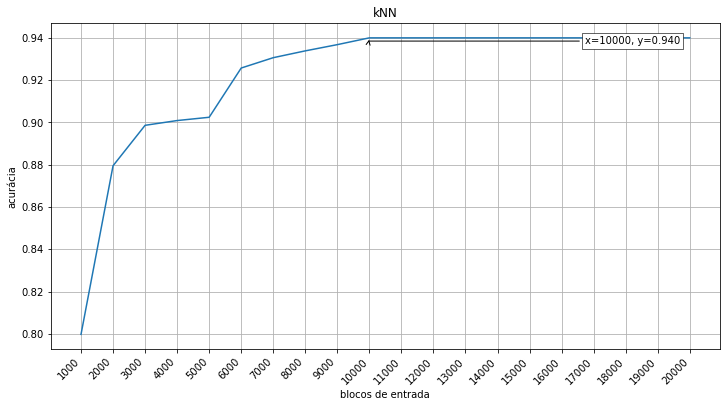

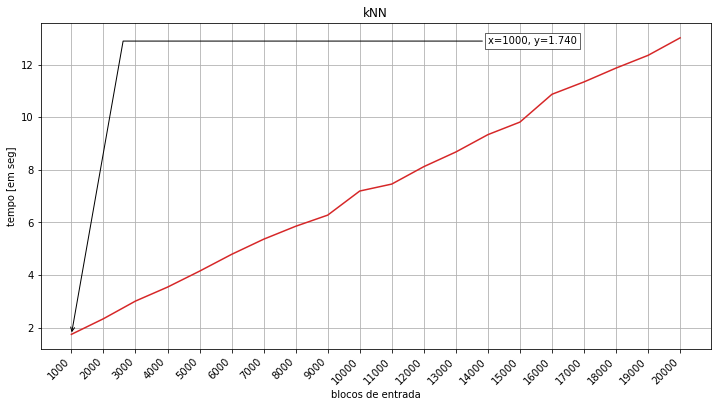

In [40]:
plot_figure(train_sizes, knn_vet_acur, 'blocos de entrada', 'acurácia', 'kNN', None, None, '#1f77b4', 'max', f'fig{fig}-kNN.png')
plot_figure(train_sizes, knn_vet_time, 'blocos de entrada', 'tempo [em seg]', 'kNN', None, None, '#d62728', 'min', f'fig{fig}-kNN(time).png')
write_csv(train_sizes, knn_vet_acur, knn_vet_time, f'knn_{suffix}.csv')
print_confusion(train_sizes, knn_vet_conf, 'kNN', f'knn_confusion-{fig}.txt')

In [ ]:
naive_vet_acur = []
naive_vet_conf = []
naive_vet_time = []

for block in train_sizes:
    print('NAIVE block training = ',block)
    naive_bayes(train_archive, test_archive, block, naive_vet_acur, naive_vet_conf, naive_vet_time)

In [ ]:
plot_figure(train_sizes, naive_vet_acur, 'blocos de entrada', 'acurácia', 'Naive Bayes', None, None, '#1f77b4', 'max', f'fig{fig}-naive.png')
plot_figure(train_sizes, naive_vet_time, 'blocos de entrada', 'tempo [em seg]', 'Naive Bayes', None, None, '#d62728', 'min', f'fig{fig}-naive(time).png')
write_csv(train_sizes, naive_vet_acur, naive_vet_time, f'naive_{suffix}.csv')
print_confusion(train_sizes, naive_vet_conf, 'Naive Bayes', f'naive_confusion-{fig}.txt')

In [ ]:
lda_vet_acur = []
lda_vet_conf = []
lda_vet_time = []

for block in train_sizes:
    print('LDA block training = ',block)
    LDA(train_archive, test_archive, block, lda_vet_acur, lda_vet_conf, lda_vet_time)

In [ ]:
plot_figure(train_sizes, lda_vet_acur, 'blocos de entrada', 'acurácia', 'LDA', None, None, '#1f77b4', 'max', f'fig{fig}-lda.png')
plot_figure(train_sizes, lda_vet_time, 'blocos de entrada', 'tempo [em seg]', 'LDA', None, None, '#d62728', 'min', f'fig{fig}-lda(time).png')
write_csv(train_sizes, lda_vet_acur, lda_vet_time, f'lda_{suffix}.csv')
print_confusion(train_sizes, lda_vet_conf, 'LDA', f'lda_confusion-{fig}.txt')

In [38]:
log_vet_acur = []
log_vet_conf = []
log_vet_time = []

for block in train_sizes:
    print('LOGISTIC block training = ',block)
    logistic_regression(train_archive, test_archive, block, 0.0001, 100, log_vet_acur, log_vet_conf, log_vet_time)

LOGISTIC block training =  1000
LOGISTIC block training =  2000
LOGISTIC block training =  3000
LOGISTIC block training =  4000
LOGISTIC block training =  5000
LOGISTIC block training =  6000
LOGISTIC block training =  7000
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
LOGISTIC block training =  8000


KeyboardInterrupt: 

In [ ]:
plot_figure(train_sizes, log_vet_acur, 'blocos de entrada', 'acurácia', 'Logistic Regression', None, None, '#1f77b4', 'max', f'fig{fig}-log.png')
plot_figure(train_sizes, log_vet_time, 'blocos de entrada', 'tempo [em seg]', 'Logistic Regression', None, None, '#d62728', 'min', f'fig{fig}-log(time).png')
write_csv(train_sizes, log_vet_acur, log_vet_time, f'log_{suffix}.csv')
print_confusion(train_sizes, log_vet_conf, 'Logistic Regression', f'log_confusion-{fig}.txt')

In [ ]:
percep_vet_acur = []
percep_vet_conf = []
percep_vet_time = []

for block in train_sizes:
    print('PERCEPTRON block training = ',block)
    perceptron(train_archive, test_archive, block, 0.0001, 100, percep_vet_acur, percep_vet_conf, percep_vet_time)

In [ ]:
plot_figure(train_sizes, percep_vet_acur, 'blocos de entrada', 'acurácia', 'Perceptron', None, None, '#1f77b4', 'max', f'fig{fig}-percep.png')
plot_figure(train_sizes, percep_vet_time, 'blocos de entrada', 'tempo [em seg]', 'Perceptron', None, None, '#d62728', 'min', f'fig{fig}-percep(time).png')
write_csv(train_sizes, percep_vet_acur, percep_vet_time, f'percep_{suffix}.csv')
print_confusion(train_sizes, percep_vet_conf, 'Perceptron', f'percep_confusion-{fig}.txt')